In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import transforms
import astropy.constants as const
import pandas as pd
import cmcrameri.cm as cmcm
from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage[T1]{fontenc} \usepackage{amsmath} \usepackage{color}'
rcParams['font.family'] = 'serif'
rcParams['axes.linewidth'] = 2
rcParams['xtick.major.width'] = 1.2
rcParams['xtick.major.size'] = 10
rcParams['xtick.minor.width'] = 1.2
rcParams['xtick.minor.size'] = 6
rcParams['ytick.major.width'] = 1.2
rcParams['ytick.major.size'] = 8
rcParams['ytick.minor.width'] = 1.2
rcParams['ytick.minor.size'] = 6 

In [36]:
df1 = pd.read_excel("../../sav/EIS/EQSPY/atlas30_fitres.xlsx")
df1["Z2A"] = df1["Z"]/df1["A"]
df1["ion"] = df1["ion"].str.strip()
df1["charge_state"] = df1["charge_state"].str.strip()
df1["fwhm_true_err"] = df1["fwhm_fit"]/(df1["fwhm_true"]*1e-3)*df1["fwhm_err"]*1e3

In [37]:
df1

,ion,charge_state,Z,A,wvl_fit,wvl_chianti,fwhm_fit,fwhm_err,fwhm_true,Z2A,fwhm_true_err
0,Fe,x,9,55.8500,184.5127,184.537,0.07390,0.00140,25.9,0.161146,3.994595
1,Fe,viii,7,55.8500,186.5793,186.598,0.07470,0.00160,28.1,0.125336,4.253381
2,Fe,xi,10,55.8500,188.1929,188.216,0.07440,0.00100,27.1,0.179051,2.745387
3,Fe,xii,11,55.8500,193.4862,193.509,0.07570,0.00110,30.7,0.196956,2.712378
4,Fe,ix,8,55.8500,197.8343,197.854,0.07790,0.00170,35.7,0.143241,3.709524
5,Fe,xiii,12,55.8500,202.0236,202.044,0.07484,0.00055,28.4,0.214861,1.449366
6,Si,x,9,28.0855,258.3772,258.374,0.08490,0.00220,49.1,0.320450,3.804073
7,S,x,9,32.0600,264.2337,264.230,0.08600,0.00210,51.0,0.280724,3.541176
8,Fe,xiv,13,55.8500,264.7868,264.788,0.08200,0.00180,43.9,0.232766,3.362187
9,Fe,xv,14,55.8500,284.1600,284.163,0.08050,0.00280,41.1,0.250671,5.484185


In [38]:
c = const.c.cgs.value
amu = const.u.cgs.value
k_B = const.k_B.cgs.value
hplanck = const.h.cgs.value

In [39]:
line_name = df["ion"] + r" \textsc{"+ df["charge_state"] + r"}"

In [40]:
Teff = df["A"]*amu/(8*np.log(2)*k_B)*(c/(df["wvl_chianti"]*1e-8))**2*(df["fwhm_true"]*1e-11)**2
Teff_err = 2*df["A"]*amu/(8*np.log(2)*k_B)*(c/(df["wvl_chianti"]*1e-8))**2*(df["fwhm_true"]*1e-11)*df["fwhm_true_err"]*1e-11

In [42]:
Teff_err.values

array([661531.46797273, 747431.78243224, 457303.79169982, 484207.1221267 ,
       736616.86040789, 219558.11734282, 306363.25968367, 323324.62514455,
       458389.54602066, 607804.3433555 ])

In [47]:
df_ion = df[["ion","charge_state","Z","A","Z2A"]]
df_ion = df_ion.drop_duplicates()
ion_name = r"\textbf{" + df_ion["ion"] + r" \textsc{"+ df_ion["charge_state"] + r"}}"

In [62]:
PaMIS_veff = np.array([28.68, 31.31])
PaMIS_veff_err = np.array([0.75, 0.86])
PaMIS_Teff = 55.85*amu/2/k_B*(PaMIS_veff*1e5)**2
PaMIS_Teff_err = 2*55.85*amu/2/k_B*(PaMIS_veff*1e5)*(PaMIS_veff_err*1e5)
PaMIS_Z2A = np.array([9,13])/np.array([55.85,55.85])

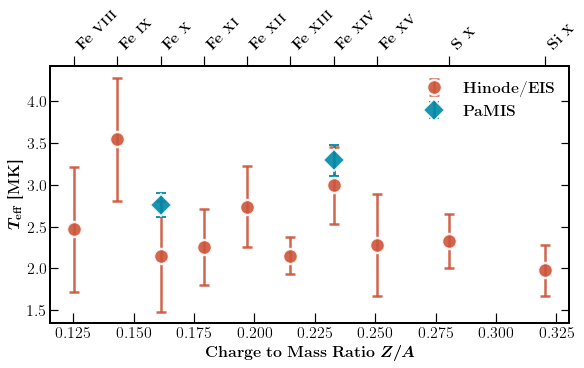

In [63]:
fig, ax = plt.subplots(figsize=(8,5),constrained_layout=True)

ax.errorbar(df["Z2A"].values, Teff.values/1e6, Teff_err.values/1e6, color="#CC543A",ls="none",marker="o",
            markersize=15,capsize=5,lw=2.5,label=r"\textbf{Hinode/EIS}",zorder=15,markeredgecolor='white',
            markeredgewidth=2.5,alpha=0.9,capthick=2.5)

ax.errorbar(PaMIS_Z2A, PaMIS_Teff/1e6, PaMIS_Teff_err/1e6, color="#0089A7",ls="none",marker="D",
            markersize=15,capsize=5,lw=2.5,label=r"\textbf{PaMIS}",zorder=15,markeredgecolor='white',
            markeredgewidth=2,alpha=0.9,capthick=2.5)

ax_ion = ax.secondary_xaxis(location="top")
ax_ion.set_xlim(ax.get_xlim())
ax_ion.set_xticks(df_ion["Z2A"].values)
ax_ion.set_xticklabels(ion_name,rotation=45,ha="left")
ax_ion.tick_params(labelsize=16)

ax.legend(loc="upper right",fontsize=16,frameon=False) 

ax.tick_params(labelsize=16,direction="in",which="both",right=True,top=False)
ax.set_xlabel(r"$\boldsymbol{\mathrm{Charge\ to\ Mass\ Ratio}\ Z/A}$",fontsize=16)
ax.set_ylabel(r"$\boldsymbol{T_{\rm eff}}$ \textbf{[MK]}",fontsize=16)

# plt.savefig(fname="../../figs/ms/Teff_Atlas30.pdf",dpi=300,format="pdf",bbox_inches="tight")